# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 1000

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 12
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 0.0
seed = 321
max_surrogate_points = 24
min_Lambda = -4
max_Lambda = 3
min_theta = -1
max_theta = 1
isotropic = False

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=60,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    acquisition_failure_strategy="random",
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_14_23_59_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_14-23-59 for SummaryWriter()


spotpython tuning: 45.355898844847545 [----------] 1.30% 
spotpython tuning: 39.27689246985392 [----------] 1.40% 
spotpython tuning: 39.27689246985392 [----------] 1.50% 
spotpython tuning: 39.27689246985392 [----------] 1.60% 
spotpython tuning: 14.210612708343556 [----------] 1.70% 
spotpython tuning: 14.210612708343556 [----------] 1.80% 
spotpython tuning: 14.210612708343556 [----------] 1.90% 
spotpython tuning: 14.210612708343556 [----------] 2.00% 
spotpython tuning: 14.210612708343556 [----------] 2.10% 
spotpython tuning: 14.210612708343556 [----------] 2.20% 
spotpython tuning: 14.210612708343556 [----------] 2.30% 
spotpython tuning: 14.210612708343556 [----------] 2.40% 
spotpython tuning: 14.210612708343556 [----------] 2.50% 
spotpython tuning: 14.210612708343556 [----------] 2.60% 
spotpython tuning: 14.210612708343556 [----------] 2.70% 
spotpython tuning: 14.210612708343556 [----------] 2.80% 
spotpython tuning: 14.210612708343556 [----------] 2.90% 
spotpython tuning

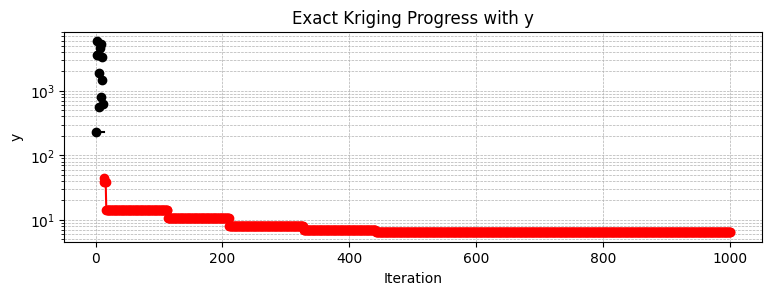

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=True, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [ ]:
infill_criterion = "ei"

In [ ]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

In [ ]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [ ]:
use_nystrom = True
nystrom_m = 5
infill_criterion = "y"

In [ ]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

In [ ]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [ ]:
infill_criterion = "ei"

In [ ]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

In [ ]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [ ]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

In [ ]:
spot_exact_y.plot_important_hyperparameter_contour(max_imp=3)
